In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

In /home/iman/anaconda3/envs/mdanalysis/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/iman/anaconda3/envs/mdanalysis/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/iman/anaconda3/envs/mdanalysis/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/iman/anaconda3/envs/mdanalysis/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [2]:
iris = load_iris()

X = iris["data"][:, (2,3)]
y = iris["target"]

print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
%%time

param_grid = {'alpha': [0.05, 0.01, 0.001],
              'penalty': ['l2', 'l1'],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'max_iter': [500, 1000, 3000],
              'eta0': [0.1, 0.01, 0.001],
              'tol': [1e-3, 1e-5, 1e-8]}

sgd_clf = SGDClassifier(loss = 'log')
sgd_clf_cv = GridSearchCV(sgd_clf, param_grid, scoring = 'f1_micro', cv=3, verbose = 1, n_jobs=-1)
sgd_clf_cv.fit(X_train, y_train)

params_optimal = sgd_clf_cv.best_params_

print("Best Score (F1 micro): ", sgd_clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1685 tasks      | elapsed:    5.8s


Best Score (F1 micro):  0.9666666666666667
Optimal Hyperparameter Values:  {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant', 'max_iter': 500, 'penalty': 'l1', 'tol': 1e-05}
CPU times: user 2.54 s, sys: 89.6 ms, total: 2.63 s
Wall time: 7 s


[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:    7.0s finished


In [6]:
sgd = SGDClassifier(loss = 'log', **params_optimal)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.01, eta0=0.1, learning_rate='constant', loss='log',
              max_iter=500, penalty='l1', tol=1e-05)

In [7]:
print("No. of Iterations: ", sgd.n_iter_)

print("\nWeighted Coefficients:\n", sgd.coef_)
print("\nWeight Intercept:\n", sgd.intercept_)

y_test_pred = sgd.predict(X_test)
accuracy_score_test = np.mean(y_test_pred==y_test)
print("\nTest Accuracy", accuracy_score_test)

print("\nTest Confusion Matrix (Test Data): \n", confusion_matrix(y_test, y_test_pred))


No. of Iterations:  69

Weighted Coefficients:
 [[-3.39069748 -2.03916457]
 [ 1.28238902 -0.65423462]
 [ 2.91662313  3.87552248]]

Weight Intercept:
 [-3.21350985 -0.6738178  -4.32412491]

Test Accuracy 1.0

Test Confusion Matrix (Test Data): 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [19]:
def plot_db(clf, X, y):
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1

    x1 = np.linspace(x1_min, x1_max, 100)
    x2 = np.linspace(x2_min, x2_max, 100)
    xx1, xx2 = np.meshgrid(x1, x2)
    
    xx = np.c_[xx1.ravel(),xx2.ravel()]
    yy = clf.predict(xx)

    plt.scatter(xx[:,0], xx[:,1], c = yy)
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.scatter(X[y==2,0], X[y==2,1])

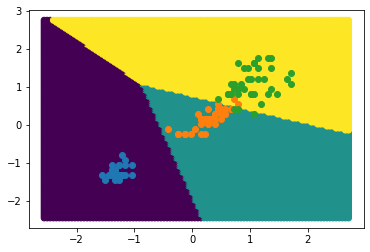

In [20]:
plot_db(sgd, X_train, y_train)

In [10]:
%%time

param_grid = {'alpha': [0.05, 0.01, 0.001],
              'penalty': ['l2', 'l1'],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'max_iter': [500, 1000, 3000],
              'eta0': [0.1, 0.01, 0.001],
              'tol': [1e-3, 1e-5, 1e-8]}

sgd_clf_es = SGDClassifier(loss = 'log', early_stopping=True)
sgd_clf_es_cv = GridSearchCV(sgd_clf_es, param_grid, scoring = 'f1_micro', cv=3, verbose = 1, n_jobs=-1)
sgd_clf_es_cv.fit(X_train, y_train)

params_optimal_es = sgd_clf_es_cv.best_params_

print("Best Score (F1 micro): ", sgd_clf_es_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1905 tasks      | elapsed:    9.0s


Best Score (F1 micro):  0.9666666666666667
Optimal Hyperparameter Values:  {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant', 'max_iter': 500, 'penalty': 'l1', 'tol': 1e-05}
CPU times: user 2.59 s, sys: 39.7 ms, total: 2.63 s
Wall time: 9.37 s


[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:    9.3s finished


In [11]:
sgd_early_stopping = SGDClassifier(loss='log', early_stopping=True, **params_optimal_es)

sgd_early_stopping.fit(X_train, y_train)

SGDClassifier(alpha=0.01, early_stopping=True, eta0=0.01, loss='log', tol=1e-05)

In [12]:
print("\nNo. of Iterations:", sgd_early_stopping.n_iter_ )

print("\nWeight Coefficients:\n", sgd_early_stopping.coef_ )

print("\nWeight Intercept:\n", sgd_early_stopping.intercept_ )

y_test_predict = sgd_early_stopping.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predict == y_test)
print("\nTest Accuracy: ", accuracy_score_test)

# Confusion Matrix
print("\nTest Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predict))


No. of Iterations: 6

Weight Coefficients:
 [[-2.24887987 -2.00919325]
 [ 1.12916975 -0.67641386]
 [ 2.31621952  2.4934623 ]]

Weight Intercept:
 [-2.51163412 -0.6104525  -3.07077598]

Test Accuracy:  1.0

Test Confusion Matrix (Test Data):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [13]:
print("\nWeight Coefficients (Without Early Stopping):\n", sgd.coef_ )
print("\nWeight Coefficients (Early Stopping):\n", sgd_early_stopping.coef_)

print("\nNo. of Iterations (Without Early Stopping):", sgd.n_iter_ )
print("No. of Iterations (Early Stopping):", sgd_early_stopping.n_iter_ )


Weight Coefficients (Without Early Stopping):
 [[-3.39069748 -2.03916457]
 [ 1.28238902 -0.65423462]
 [ 2.91662313  3.87552248]]

Weight Coefficients (Early Stopping):
 [[-2.24887987 -2.00919325]
 [ 1.12916975 -0.67641386]
 [ 2.31621952  2.4934623 ]]

No. of Iterations (Without Early Stopping): 69
No. of Iterations (Early Stopping): 6


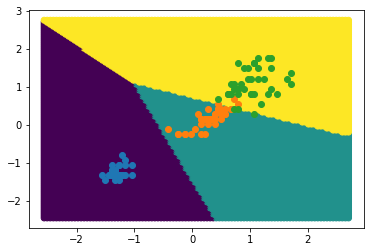

In [22]:
plot_db(sgd_early_stopping, X_train, y_train)